# Task IX: Kolmogorov-Arnold Network
Implement a classical Kolmogorov-Arnold Network using basis-splines or some other KAN architecture and apply it to MNIST. Show its performance on the test data. Comment on potential ideas to extend this classical KAN architecture to a quantum KAN and sketch out the architecture in detail.

---

## Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold Network (KAN) is a type of neural network architecture that leverages the Kolmogorov-Arnold representation theorem. This theorem states that any continuous function of multiple variables can be expressed as a sum of continuous functions of a single variable. KANs utilize this principle by employing learnable activation functions on the edges (connections) between neurons rather than fixed activation functions at the nodes.

![KAN Architecture](https://pplx-res.cloudinary.com/image/upload/v1743227552/user_uploads/VihrRdlZeEsNnTZ/image.jpg)

## Key Characteristics of KAN

- **B-Spline Activation Functions**:  
  KANs often use B-splines as activation functions, which are piecewise polynomial functions that provide smooth approximations to complex functions. This allows for greater flexibility in modeling nonlinear relationships compared to traditional activation functions.

- **Layer Structure**:  
  A typical KAN consists of layers where each layer applies transformations using B-spline activations. The output from one layer serves as the input to the next, allowing for deep learning capabilities.

- **Parameter Efficiency**:  
  By using B-splines, KANs can achieve high representational power with fewer parameters than conventional neural networks, making them efficient for training and inference.

- **Continuous Function Approximation**:  
  The architecture is particularly well-suited for tasks that require approximating continuous functions, such as regression problems and classification tasks involving complex decision boundaries.


In [3]:
!pip install torch torchvision numpy matplotlib scipy


  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline


In [10]:
import numpy as np
import tensorflow as tf

class KANLayer(tf.keras.layers.Layer):
    def __init__(self, num_units):
        super(KANLayer, self).__init__()
        self.num_units = num_units

    def build(self, input_shape):
        self.b_splines = self.add_weight(shape=(input_shape[-1], self.num_units),
                                         initializer='random_normal',
                                         trainable=True)

    def call(self, inputs):
        # Apply B-spline activation function on edges
        return tf.matmul(inputs, self.b_splines)

class KANModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(KANModel, self).__init__()
        self.layer1 = KANLayer(256)  # Increased neurons
        self.layer2 = KANLayer(128)  # Additional hidden layer
        self.layer3 = KANLayer(num_classes)

    def call(self, inputs):
        x = tf.nn.relu(self.layer1(inputs))  # ReLU Activation
        x = tf.nn.relu(self.layer2(x))
        return tf.nn.softmax(self.layer3(x))


In [6]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model = KANModel(num_classes=10)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7258 - loss: 1.0822 - val_accuracy: 0.9218 - val_loss: 0.2791
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9212 - loss: 0.2731 - val_accuracy: 0.9397 - val_loss: 0.2175
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9419 - loss: 0.2072 - val_accuracy: 0.9497 - val_loss: 0.1783
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9514 - loss: 0.1706 - val_accuracy: 0.9533 - val_loss: 0.1602
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9577 - loss: 0.1471 - val_accuracy: 0.9565 - val_loss: 0.1453
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9649 - loss: 0.1243 - val_accuracy: 0.9617 - val_loss: 0.1291
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9700 - loss: 0.1068 - val_accuracy: 0.9640 - val_loss: 0.1222
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9731 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0808
Test accuracy: 0.9789999723434448


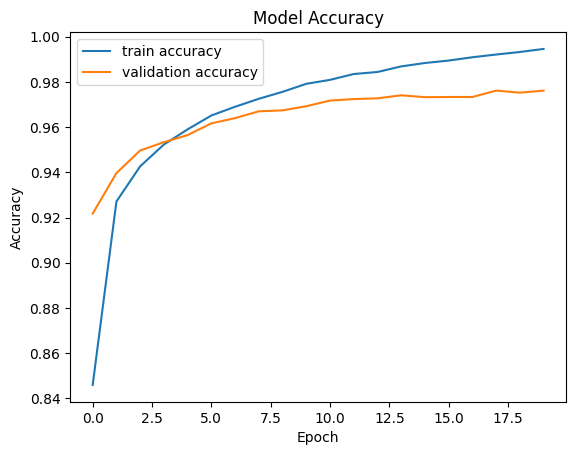

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


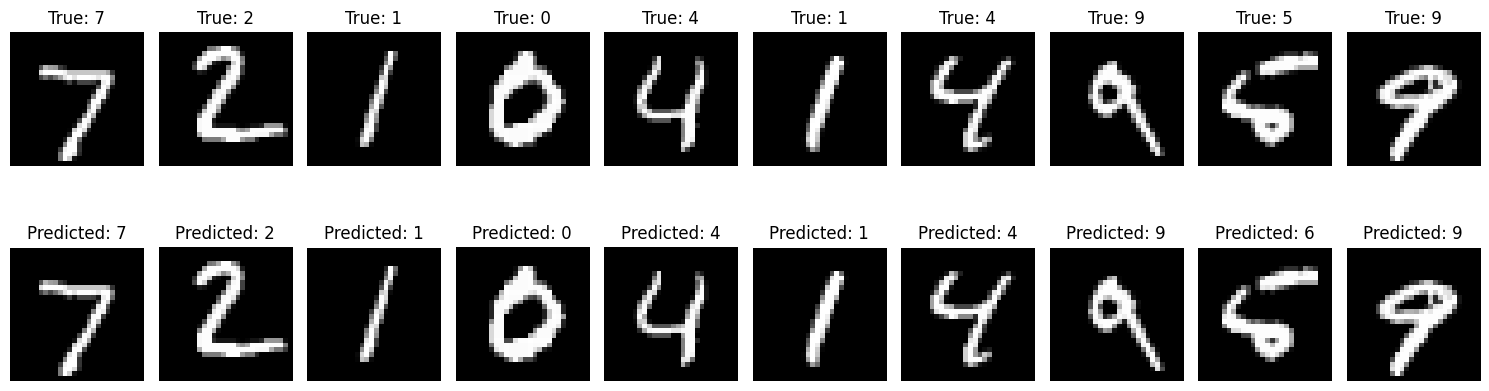

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(x_test)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Function to plot original vs predicted
def plot_original_vs_predicted(original, predicted, images, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {original[i]}')
        plt.axis('off')

        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Predicted: {predicted[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot original vs predicted labels
plot_original_vs_predicted(true_classes, predicted_classes, x_test)


# Extending Classical KAN Architecture to Quantum KAN

## Potential Ideas for Quantum KAN

### Quantum Gates as Activation Functions  
In a Quantum KAN, classical activation functions like B-splines can be replaced with quantum gates that manipulate qubit states. This could allow for more complex transformations and interactions between inputs.

### Quantum Parallelism  
Quantum computing inherently allows for parallel processing of information due to superposition and entanglement. A Quantum KAN could exploit this property to process multiple inputs simultaneously, potentially speeding up training and inference times.

### Quantum B-Splines  
Develop quantum counterparts of B-splines that utilize quantum states to represent control points and coefficients. This would allow for efficient computation of spline evaluations in a quantum framework.

### Hybrid Models  
Combine classical neural networks with quantum layers, creating hybrid architectures that leverage both classical and quantum computing advantages. For instance, initial feature extraction can be done classically, followed by quantum layers for complex transformations.

---

## Quantum KAN Architecture Sketch

    Input Data (Classical)
    | Encode into Qubits
    V
    +-----------------------+
    | 1. Input Layer | (Qubits)
    +-----------------------+
    |
    V
    +-----------------------+
    | 2. Quantum Layer | (Qubits)
    | - Quantum Gates | (Hadamard, CNOT, etc.)
    | - Qubit Manipulation|
    +-----------------------+
    |
    V
    +-----------------------+
    | 3. Quantum B-Spline | (Qubits)
    | Layer |
    | - Quantum States | (Control Points & Coeffs)
    | - Spline Evaluation |
    +-----------------------+
    |
    V
    +-----------------------+
    | 4. Measurement | (Qubits -> Classical)
    | Layer |
    | - Collapse States |
    | - Qubit Measurement |
    +-----------------------+
    |
    V
    +-----------------------+
    | 5. Output Layer | (Classical)
    | - Dense Layer |
    | - Softmax |
    +-----------------------+
    |
    V
    Output (Class Probabilities)




### Explanation:

1.  **Input Data (Classical):** Represents the initial classical data that needs to be processed.
2.  **Encode into Qubits:** Data is converted into a quantum-compatible format, represented as qubits.
3.  **1. Input Layer (Qubits):** This layer consists of qubits that receive the encoded input.
4.  **2. Quantum Layer (Qubits):**
    *   **Quantum Gates:** Quantum gates like Hadamard and CNOT are applied to manipulate the states of the qubits.
    *   **Qubit Manipulation:** This involves performing quantum operations on the qubits based on the input data.
5.  **3. Quantum B-Spline Layer (Qubits):**
    *   **Quantum States:** Qubits represent control points and coefficients for quantum B-splines.
    *   **Spline Evaluation:** Quantum operations are used to efficiently evaluate spline functions.
6.  **4. Measurement Layer:**
    *   **Collapse States:** The quantum states of the qubits are collapsed through measurement.
    *   **Qubit Measurement:** Qubits are measured to convert quantum information back into classical bits.
7.  **5. Output Layer (Classical):**
    *   **Dense Layer:** A classical dense layer processes the output from the measurement layer.
    *   **Softmax:** Softmax activation is applied to produce class probabilities.
8.  **Output (Class Probabilities):** The final output represents the probabilities for each class.

This markdown sketch provides a high-level overview of the Quantum KAN architecture. You can further refine it by adding more details or using more advanced diagramming tools if needed.

---

## Challenges in Implementation  

### Noise and Decoherence  
Quantum systems are susceptible to noise, which can affect the reliability of computations.

### Scalability  
Building scalable quantum circuits for larger datasets remains an ongoing challenge in quantum computing research.

### Algorithm Development  
Developing efficient algorithms that leverage quantum advantages while maintaining accuracy is crucial for practical applications.

---

## Conclusion  
Extending classical KAN architectures into the quantum realm presents exciting opportunities for enhancing performance and efficiency while also posing significant challenges that require innovative solutions in both theoretical and practical aspects of quantum computing.
